In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
uploaded = files.upload()

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Задание 1:

### 1.1 Изучите стоимости недвижимости:

Text(0, 0.5, 'Количество')

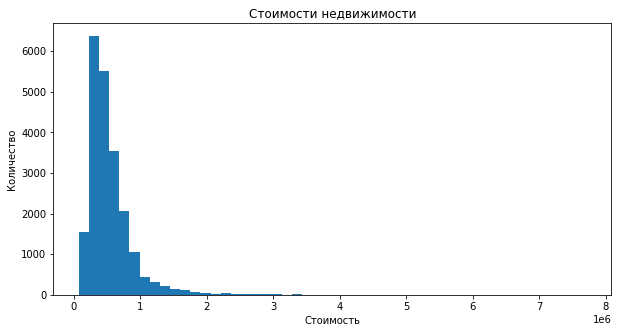

In [3]:
plt.figure(figsize=(10, 5))
plt.hist(df['price'], bins=50)
plt.title('Стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')

Большинство домов до 1млн

### 1.2 Изучите распределение квадратуры жилой:

Text(0, 0.5, 'Количество')

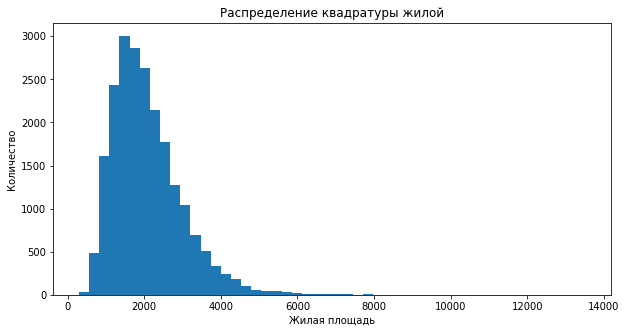

In [4]:
plt.figure(figsize=(10, 5))
plt.hist(df['sqft_living'], bins=50)
plt.title('Распределение квадратуры жилой')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество')

В среднем жилая площадь 2000 м2

### 1.3 Изучите распределение года постройки:

Text(0, 0.5, 'Количество')

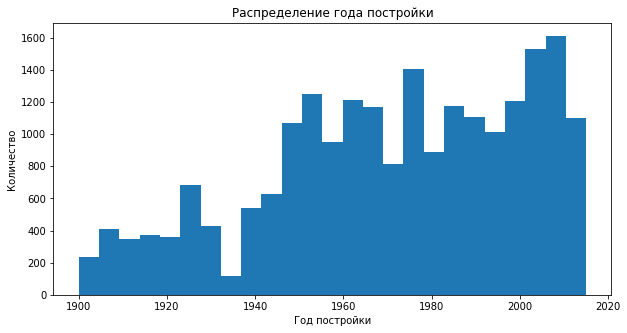

In [5]:
plt.figure(figsize=(10, 5))
plt.hist(df['yr_built'], bins=25)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество')

Количество продаваемой недвижимости возрастает с годом постройки

## Задание 2:

### 2.1 Изучите распределение домов от наличия вида на набережную:


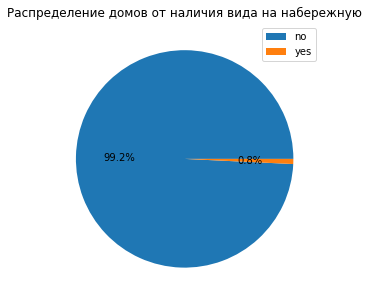

In [6]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
plt.figure(figsize=(5, 5))
plt.pie(df['waterfront'].value_counts(), autopct='%1.1f%%')
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(data.index);

Домов с видом на набережную менее 1 %

### 2.2 Изучите распределение этажей домов:

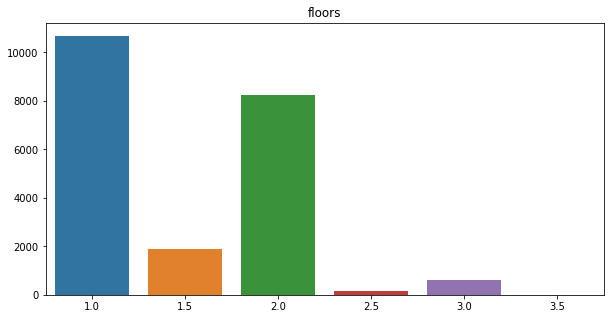

In [7]:
data = df['floors'].value_counts()    
plt.figure(figsize=(10, 5))    
plt.title('floors')
sns.barplot(x=data.index, y=data.values)    
plt.show()

В основном, дома 1 и 2 этажные

### 2.3 Изучите распределение состояния домов:

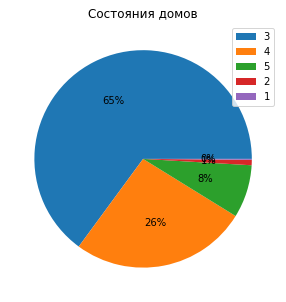

In [8]:
data = df["condition"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(data.values, autopct='%1.lf%%')
plt.title('Состояния домов')
plt.legend(data.index);

Большинство домов оценены в 3 балла

## Задание 3:

### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости.

<Figure size 720x360 with 0 Axes>

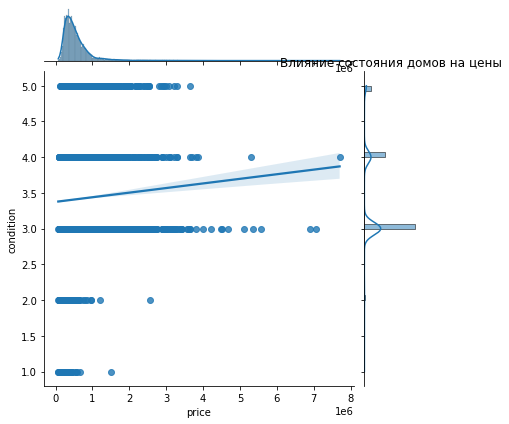

In [9]:
plt.figure(figsize=(10, 5))
sns.jointplot(x=df['price'], y=df['condition'], kind='reg')
plt.title('Влияние состояния домов на цены');

<Figure size 720x360 with 0 Axes>

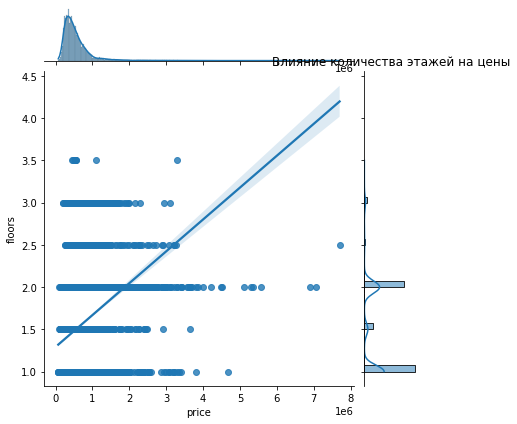

In [10]:
plt.figure(figsize=(10, 5))
sns.jointplot(x=df['price'], y=df['floors'], kind='reg')
plt.title('Влияние количества этажей на цены');

<Figure size 720x360 with 0 Axes>

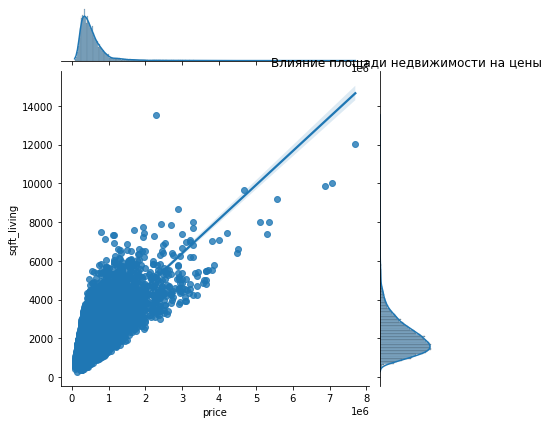

In [11]:
plt.figure(figsize=(10, 5))
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.title('Влияние площади недвижимости на цены');

<Figure size 720x360 with 0 Axes>

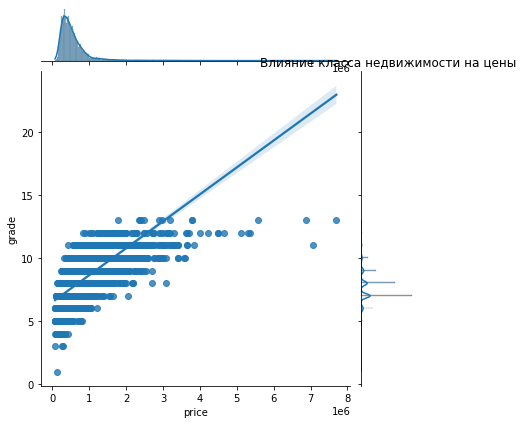

In [12]:
plt.figure(figsize=(10, 5))
sns.jointplot(x=df['price'], y=df['grade'], kind='reg')
plt.title('Влияние класса недвижимости на цены');

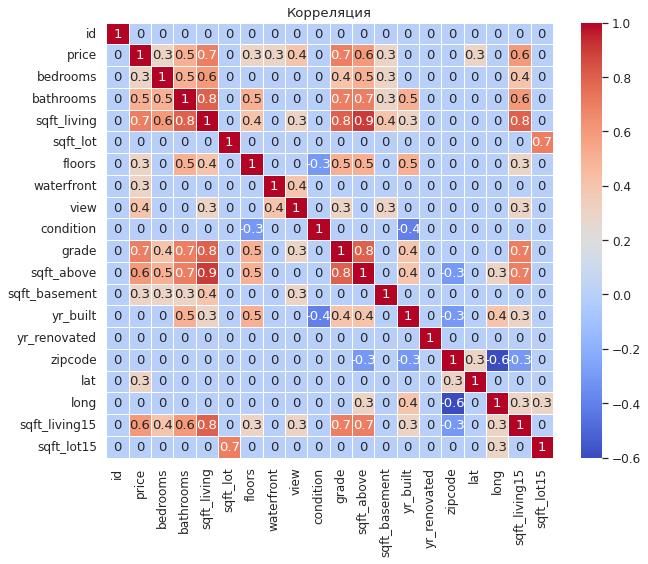

In [13]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.1)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Корреляция')
plt.xticks(rotation=90);

На стоимость недвижимости влияет площадь недвижимости и количество этажей. Особое влияние на стоимость оказывает класс недвижимости.